In [24]:
import os
import pandas as pd
import numpy as np
import json
import pickle
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import prepare_data, load_source, slice_d

41	0.84841
41	0.848169


,ksvector_l1,ksvector_l1_lambda,eval_auc,best_epoch,waviness_l1,waviness_l2,name
0,0.010628,0.0,0.848410,41,0.032010,0.003674,/code/output/1126_pakdd_ksvector/20191126-0858...
1,0.009781,0.5,0.848169,41,0.031029,0.003433,/code/output/1126_pakdd_ksvector/20191126-0858...


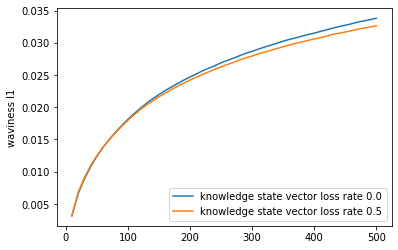

In [58]:
projectdir = Path(parentPath)
summary = pd.DataFrame(
    columns=['ksvector_l1', 'ksvector_l1_lambda', 
             'eval_auc', 'best_epoch',
             'waviness_l1', 'waviness_l2',
            'name'],
)
reports = [
    projectdir / 'output/1126_pakdd_ksvector/20191126-0904_ks00_ksdkt/report/ksdkt.json', 
    projectdir / 'output/1126_pakdd_ksvector/20191126-0858_ks05_ksdkt/report/ksdkt.json',
]

with open(reports[0], 'r') as f:
    rep = json.load(f)
auc_ar = np.array(rep['indicator']['eval_auc'])
best_auc = auc_ar.max()
best_epoch = auc_ar.argmax()
print('{}\t{:.6}'.format(best_epoch, best_auc))
summary = summary.append({
    'name': str(report_path),
    'eval_auc': best_auc,
    'best_epoch': best_epoch,
    'ksvector_l1_lambda': rep['config']['ksvector_l1'],
    'ksvector_l1': rep['indicator']['ksvector_l1'][best_epoch],
    'waviness_l1': rep['indicator']['waviness_l1'][best_epoch],
    'waviness_l2': rep['indicator']['waviness_l2'][best_epoch],
}, ignore_index=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rep['indicator']['epoch'], rep['indicator']['waviness_l1'], label='knowledge state vector loss rate 0.0')
# ax.plot(rep['indicator']['epoch'], rep['indicator']['ksvector_l1'], label='knowledge state vector loss rate 0.0')

with open(reports[1], 'r') as f:
    rep = json.load(f)
auc_ar = np.array(rep['indicator']['eval_auc'])
best_auc = auc_ar.max()
best_epoch = auc_ar.argmax()
print('{}\t{:.6}'.format(best_epoch, best_auc))
summary = summary.append({
    'name': str(report_path),
    'eval_auc': best_auc,
    'best_epoch': best_epoch,
    'ksvector_l1_lambda': rep['config']['ksvector_l1'],
    'ksvector_l1': rep['indicator']['ksvector_l1'][best_epoch],
    'waviness_l1': rep['indicator']['waviness_l1'][best_epoch],
    'waviness_l2': rep['indicator']['waviness_l2'][best_epoch],
}, ignore_index=True)

ax.plot(rep['indicator']['epoch'], rep['indicator']['waviness_l1'], label='knowledge state vector loss rate 0.5')
# ax.plot(rep['indicator']['epoch'], rep['indicator']['ksvector_l1'], label='knowledge state vector loss rate 0.5')
ax.legend()
plt.ylabel('waviness l1')
# plt.ylabel('knowledge state vector loss')


summary.head()

In [34]:
print(summary.head())

   ksvector_l1  ksvector_l1_lambda  eval_auc best_epoch  waviness_l1  \
0     0.010628                 0.0  0.848410         41     0.032010   
1     0.009781                 0.5  0.848169         41     0.031029   

   waviness_l2                                               name  
0     0.003674  /code/output/1126_pakdd_ksvector/20191126-0904...  
1     0.003433  /code/output/1126_pakdd_ksvector/20191126-0858...  


In [35]:
"output/1124_geddkt/20191125-0335_ef15_geddkt/checkpoints/geddkt_auc0.8075_e1100.model"
"output/1124_geddkt/20191125-1015_ef15_w1w2_geddkt/checkpoints/geddkt_auc0.8079_e1300.model"
# w1, w2の値が欠けている

'output/1124_geddkt/20191125-1015_ef15_w1w2_geddkt/checkpoints/geddkt_auc0.8079_e1300.model'